<a href="https://colab.research.google.com/github/komolcia/SEA_EU/blob/main/1_pun_detectionES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.6 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from random import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
import openai
import os
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import re
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
data_train = pd.read_json("joker-detection-ES-train.json")
location_train=pd.read_json("joker-location-ES-train.json")
data_train=data_train.merge(location_train,how='outer')
y=[]
for x in data_train['wordplay']:
    if x =="no":
        y.append(False)
    else:
        y.append(True)
data_train['pun_label']=y
data_train

,id,text,wordplay,location,pun_label
0,es_1152a,El granjero decidió comprar una vaca y exprimi...,yes,exprimir,True
1,es_3012b,"Cuando el avión sufrió turbulencias, los pasaj...",yes,volando,True
2,es_2241,"Hey Jesús. - ¿Salió cara la cena? No, salió mala.",no,NaN,False
3,es_7966c,El abogado hizo una pregunta cargada sobre las...,yes,armas,True
4,es_2955,VanDeGraaf encargó a su asistente que asistiera.,no,NaN,False
...,...,...,...,...,...
835,es_3513,El médico no podía transferir los órganos porq...,no,NaN,False
836,es_1452a,"Era la hija del bibliotecario, y siempre le mi...",yes,forro,True
837,es_1254a,Cuando el reparador de TV se casó la sintonía ...,yes,sintonía,True
838,es_4671b,Una banda de rock colocada en el piso de inter...,yes,valores,True


In [12]:
data_test=pd.read_json("/content/joker-detection-ES-test.json")
location_test=pd.read_json("/content/joker-location-ES-test.json")
data_test=data_test.merge(location_test)
data_test

,id,text,wordplay,location
0,es_1,La sopa hirviendo… que ir viendo la sopa.,yes,viendo
1,es_2,Comer carne con un tenedor... que comer carne ...,yes,contenedor
2,es_3,"Sal gorda... que ¡gorda!, sal.",yes,gorda
3,es_4,Un mal hombre en estado de coma. que te comas ...,yes,comas
4,es_5,Tomar el metro en la Puerta del Sol. que tomar...,yes,metro
...,...,...,...,...
1831,es_1369,"Él era un crítico de restaurante, pero no tení...",yes,gusto
1832,es_5439b,"Era un crítico gastronómico, pero no tenía ni ...",yes,gusto
1833,es_5439c,"Era crítico gastronómico, pero no tenía nada d...",yes,gusto
1834,es_5439d,"Era crítico gastronómico, pero no tenía buen g...",yes,gusto


In [13]:
import nltk
nltk.download('punkt')
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data_train.text:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data_train['location'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data_train["the_indexes"]=b
data_train["index"]=c
X=b
y=x
data_train
X=data_train["index"].values.astype("int").reshape(-1, 1)
y = data_train["pun_label"].values 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['El', 'granjero', 'decidió', 'comprar', 'una', 'vaca', 'y', 'exprimir', 'la', 'idea', 'al', 'máximo', '.'], ['Cuando', 'el', 'avión', 'sufrió', 'turbulencias', ',', 'los', 'pasajeros', 'salieron', 'volando', '.'], ['Hey', 'Jesús', '.', '-', '¿Salió', 'cara', 'la', 'cena', '?', 'No', ',', 'salió', 'mala', '.'], ['El', 'abogado', 'hizo', 'una', 'pregunta', 'cargada', 'sobre', 'las', 'armas', '.'], ['VanDeGraaf', 'encargó', 'a', 'su', 'asistente', 'que', 'asistiera', '.'], ['Su', 'pasatiempo', 'de', 'aeromodelismo', 'realmente', 'despegó', '.'], ['Los', 'jueces', 'viejos', 'nunca', 'mueren', ',', 'solo', 'se', 'sentencian', '.'], ['¿Cuál', 'es', 'la', 'diferencia', 'entre', 'un', 'volcán', 'y', 'un', 'terremoto', '?', '¿Que', 'el', 'terremoto', 'ensucia', '-', 'Y', 'el', 'volcán', '?', '-', 'Deslava', '.'], ['¿Qué', 'le', 'dice', 'un', 'refresco', 'a', 'otro', 'cuando', 'uno', 'entra', 'en', 'la', 'casa', 'del', 'otro', '?', 'Pase', '.'], ['El', 'coche', 'se', 'detuvo', 'con', 'un', 'ti

In [14]:
data_train

,id,text,wordplay,location,pun_label,the_indexes,index
0,es_1152a,El granjero decidió comprar una vaca y exprimi...,yes,exprimir,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",7
1,es_3012b,"Cuando el avión sufrió turbulencias, los pasaj...",yes,volando,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",9
2,es_2241,"Hey Jesús. - ¿Salió cara la cena? No, salió mala.",no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",-1
3,es_7966c,El abogado hizo una pregunta cargada sobre las...,yes,armas,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",8
4,es_2955,VanDeGraaf encargó a su asistente que asistiera.,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7]",-1
...,...,...,...,...,...,...,...
835,es_3513,El médico no podía transferir los órganos porq...,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",-1
836,es_1452a,"Era la hija del bibliotecario, y siempre le mi...",yes,forro,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",12
837,es_1254a,Cuando el reparador de TV se casó la sintonía ...,yes,sintonía,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",8
838,es_4671b,Una banda de rock colocada en el piso de inter...,yes,valores,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",16


In [15]:
data_test["text"].size


1836

In [16]:
from openai.error import RateLimitError
from scipy.sparse import data
import time
openai.api_key = ""
def simpleMyPrompt(prompt,input):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt+'Text: '+input+'\nWord:',
  temperature=0.7,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  return response
prompt =  'Text: El granjero decidió comprar una vaca y exprimir la idea al máximo.\n\
Word: exprimir\n\
\n\
Text: Su pasatiempo de aeromodelismo realmente despegó.\n\
Word: despegó\n\
\n\
Text: Edison pensó que sería una experiencia que lo iluminaría.\n\
Word: Not Found\n\
\n'
a=0
data_test1=[]
for i in range(1,4):
  if i*50<data_test["text"].size:
      data_test1.append(data_test['text'].iloc[a:i*40].apply(lambda x:simpleMyPrompt(prompt,x)))
  a=i*50
  time.sleep(30)
  print(i)
  #print(data_test1)


1
2
3


In [17]:
data_test1

[0     {'id': 'cmpl-74wo0j0Z8wQ6aOJi4olkquaR2L71U', '...
 1     {'id': 'cmpl-74wo09zHzSE2IaZJN3le6P4VJ4MBo', '...
 2     {'id': 'cmpl-74wo1tmFYn27M6lSckPYC7spi6XBC', '...
 3     {'id': 'cmpl-74wo1QjZ4So4wOHgUTR5Vdf9qlIf4', '...
 4     {'id': 'cmpl-74wo1u1b3IVWs5x6ICj8Kv0OmIs9b', '...
 5     {'id': 'cmpl-74wo2iwuLRcXwUHsOQfHkxzcRuykL', '...
 6     {'id': 'cmpl-74wo2gFzWiRTw3Rx9QMAoEFVVbKt5', '...
 7     {'id': 'cmpl-74wo3jf1A2mdrPQU2xCE62fY5hf5g', '...
 8     {'id': 'cmpl-74wo3lYdIzHMnX8vu1JKEAx56k4cQ', '...
 9     {'id': 'cmpl-74wo4aon717dbArc9DKPhppBYOokg', '...
 10    {'id': 'cmpl-74wo4JhmP8wtiD4SrThmUKKfdNZ90', '...
 11    {'id': 'cmpl-74wo4ntFm9TpxRqyrEKu8tgwG9W09', '...
 12    {'id': 'cmpl-74wo5s8s39YsXHF0ZY4zNx7ms7Juq', '...
 13    {'id': 'cmpl-74wo5vpJo1vumPlv4oq6JauJMCFzG', '...
 14    {'id': 'cmpl-74wo6V5BiAwfDidNEsQHQ5Uuecp8D', '...
 15    {'id': 'cmpl-74wo6Gt46qbyp2NuWJqQ5tCZFc1Z4', '...
 16    {'id': 'cmpl-74wo6ZZoUJOYJjiAqS6UutNS31V9z', '...
 17    {'id': 'cmpl-74wo7qFakfV

In [18]:
from functools import reduce
from operator import concat
data_test3 = pd.DataFrame()

data_test3['location_gpt3_my_full']=[smt for sublist in data_test1 for smt in sublist]
print(data_test3['location_gpt3_my_full'])
data_test3['location_gpt3_my']=data_test3['location_gpt3_my_full'].str['choices'].str[0].str['text'].str.strip()
data_test3['location']=data_test3['location_gpt3_my'].str.split('\n')
data_test3

0     {'id': 'cmpl-74wo0j0Z8wQ6aOJi4olkquaR2L71U', '...
1     {'id': 'cmpl-74wo09zHzSE2IaZJN3le6P4VJ4MBo', '...
2     {'id': 'cmpl-74wo1tmFYn27M6lSckPYC7spi6XBC', '...
3     {'id': 'cmpl-74wo1QjZ4So4wOHgUTR5Vdf9qlIf4', '...
4     {'id': 'cmpl-74wo1u1b3IVWs5x6ICj8Kv0OmIs9b', '...
                            ...                        
85    {'id': 'cmpl-74wpVZVXhOZl84orlwvmyL2My2y75', '...
86    {'id': 'cmpl-74wpV5qEinlH1EDiwkZUvnfLcijbk', '...
87    {'id': 'cmpl-74wpWW6ekyuY4Ru0MeyMKm9n1uKB8', '...
88    {'id': 'cmpl-74wpWkHEfKsOsb7i91mvvdn8muKJj', '...
89    {'id': 'cmpl-74wpWKkfAFvIRP6MPO5jMrVf0o08c', '...
Name: location_gpt3_my_full, Length: 90, dtype: object


,location_gpt3_my_full,location_gpt3_my,location
0,"{'id': 'cmpl-74wo0j0Z8wQ6aOJi4olkquaR2L71U', '...",viendo,[viendo]
1,"{'id': 'cmpl-74wo09zHzSE2IaZJN3le6P4VJ4MBo', '...",tenedor,[tenedor]
2,"{'id': 'cmpl-74wo1tmFYn27M6lSckPYC7spi6XBC', '...",gorda,[gorda]
3,"{'id': 'cmpl-74wo1QjZ4So4wOHgUTR5Vdf9qlIf4', '...",comas,[comas]
4,"{'id': 'cmpl-74wo1u1b3IVWs5x6ICj8Kv0OmIs9b', '...",tomar,[tomar]
...,...,...,...
85,"{'id': 'cmpl-74wpVZVXhOZl84orlwvmyL2My2y75', '...",órbita,[órbita]
86,"{'id': 'cmpl-74wpV5qEinlH1EDiwkZUvnfLcijbk', '...",martillazo,[martillazo]
87,"{'id': 'cmpl-74wpWW6ekyuY4Ru0MeyMKm9n1uKB8', '...",avaro,[avaro]
88,"{'id': 'cmpl-74wpWkHEfKsOsb7i91mvvdn8muKJj', '...",broma,[broma]


In [19]:
y=[]
for x in data_test3['location']:
    if x =="Not Found":
        y.append(False)
    else:
        y.append(True)
data_test3['pun_label']=y

In [20]:
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data_test.iloc[:90].text:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data_test3['location_gpt3_my'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data_test3["the_indexes"]=b
data_test3["index"]=c
data_test3

[['La', 'sopa', 'hirviendo…', 'que', 'ir', 'viendo', 'la', 'sopa', '.'], ['Comer', 'carne', 'con', 'un', 'tenedor', '...', 'que', 'comer', 'carne', 'en', 'un', 'contenedor', '.'], ['Sal', 'gorda', '...', 'que', '¡gorda', '!', ',', 'sal', '.'], ['Un', 'mal', 'hombre', 'en', 'estado', 'de', 'coma', '.', 'que', 'te', 'comas', 'un', 'hombre', 'en', 'mal', 'estado', '.'], ['Tomar', 'el', 'metro', 'en', 'la', 'Puerta', 'del', 'Sol', '.', 'que', 'tomar', 'el', 'sol', 'en', 'la', 'puerta', 'del', 'metro', '.'], ['Vivir', 'en', 'Consuegra', '...', 'que', 'vivir', 'con', 'la', 'suegra', '.'], ['Decir', 'Andalucía', '...', 'que', 'decir', 'a', 'Lucía', 'que', 'ande', '.'], ['Tener', 'una', 'familia', 'en', 'la', 'Mancha', '...', 'que', 'tener', 'una', 'mancha', 'en', 'la', 'familia', '.'], ['Ir', 'a', 'Marmolejo', '...', 'que', 'ir', 'lejos', 'por', 'mármol', '.'], ['Una', 'colonia', 'inglesa', '...', 'que', 'una', 'inglesa', 'en', 'Colonia', '.'], ['Tener', 'una', 'casa', 'en', 'Cuba', '...', 'q

,location_gpt3_my_full,location_gpt3_my,location,pun_label,the_indexes,index
0,"{'id': 'cmpl-74wo0j0Z8wQ6aOJi4olkquaR2L71U', '...",viendo,[viendo],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",5
1,"{'id': 'cmpl-74wo09zHzSE2IaZJN3le6P4VJ4MBo', '...",tenedor,[tenedor],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",4
2,"{'id': 'cmpl-74wo1tmFYn27M6lSckPYC7spi6XBC', '...",gorda,[gorda],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8]",1
3,"{'id': 'cmpl-74wo1QjZ4So4wOHgUTR5Vdf9qlIf4', '...",comas,[comas],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",10
4,"{'id': 'cmpl-74wo1u1b3IVWs5x6ICj8Kv0OmIs9b', '...",tomar,[tomar],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",10
...,...,...,...,...,...,...
85,"{'id': 'cmpl-74wpVZVXhOZl84orlwvmyL2My2y75', '...",órbita,[órbita],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
86,"{'id': 'cmpl-74wpV5qEinlH1EDiwkZUvnfLcijbk', '...",martillazo,[martillazo],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",-1
87,"{'id': 'cmpl-74wpWW6ekyuY4Ru0MeyMKm9n1uKB8', '...",avaro,[avaro],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
88,"{'id': 'cmpl-74wpWkHEfKsOsb7i91mvvdn8muKJj', '...",broma,[broma],True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1


Classes:  [False  True]

*--------------------------------------------------*

Score:  0.3950617283950617

*--------------------------------------------------*

Training set score: 0.9926
Test set score: 0.3951

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*



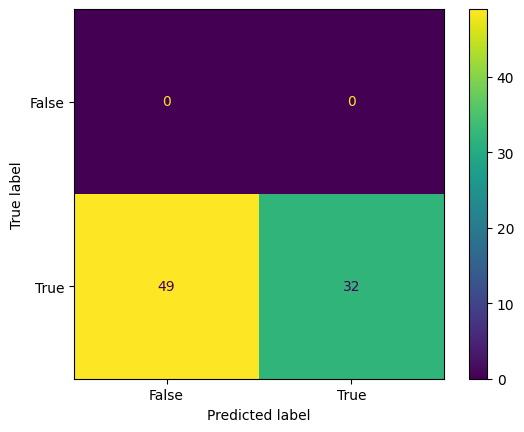

In [21]:
X=data_train["index"].values.astype("int").reshape(-1, 1)
y = data_train["pun_label"].values
X_train, X_test1,y_train,y_test1 = train_test_split(X,y,test_size=0.2,random_state=7)
X=data_test3["index"].values.astype("int").reshape(-1, 1)
y = data_test3["pun_label"].values 
X_train1, X_test,y_train1,y_test = train_test_split(X,y,test_size=0.9,random_state=7)

#X_train, y_train = train.drop("target"), train["target"]
#X_test, y_test = test.drop("target"), test["target"]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred_labels=clf.predict(X_test)
print("Classes: ",clf.classes_)
score=clf.score(X_test,y_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [22]:
def naive_Bayes(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels

Classes:  [False  True]

*--------------------------------------------------*

Class Priors:  [0.46875 0.53125]

*--------------------------------------------------*

Score:  0.3950617283950617

*--------------------------------------------------*

Training set score: 0.9926
Test set score: 0.3951

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28   

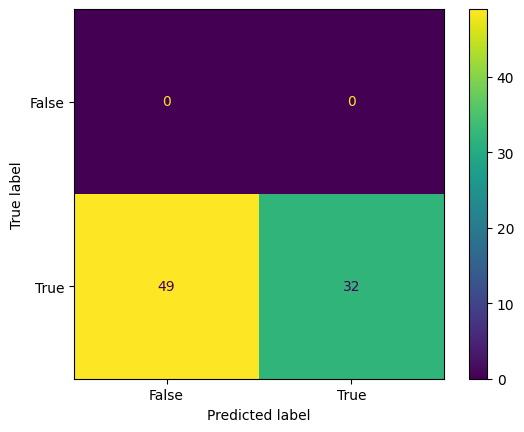

(array([[-1],
        [18],
        [ 8],
        [ 9],
        [40],
        [16],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [12],
        [14],
        [-1],
        [-1],
        [ 9],
        [-1],
        [-1],
        [12],
        [-1],
        [ 8],
        [-1],
        [-1],
        [-1],
        [ 7],
        [ 7],
        [12],
        [ 6],
        [-1],
        [16],
        [10],
        [14],
        [12],
        [-1],
        [-1],
        [-1],
        [ 4],
        [-1],
        [ 8],
        [-1],
        [-1],
        [19],
        [-1],
        [-1],
        [-1],
        [21],
        [14],
        [12],
        [17],
        [16],
        [11],
        [27],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [14],
        [-1],
        [15],
        [ 5],
        [ 5],
        [-1],
        [-1],
        [11],
        [-1],
        [-1],
        [14],
      

In [23]:
naive_Bayes(X,y, GaussianNB())


*--------------------------------------------------*

Score:  0.2839506172839506

*--------------------------------------------------*

Training set score: 0.9628
Test set score: 0.2840

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.28      0.44        81

    accuracy                           0.28        81
   macro avg       0.50      0.14      0.22        81
weighted avg       1.00      0.28      0.44        81


*--------------------------------------------------*



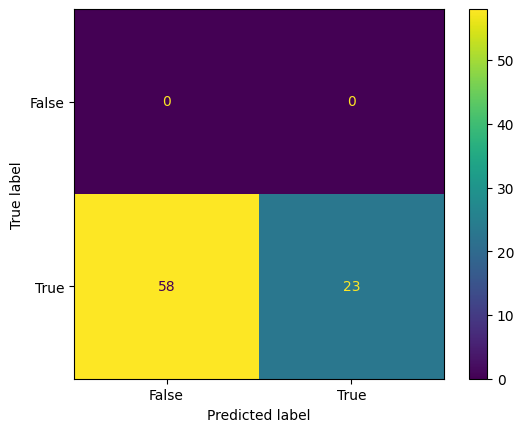

(array([[-1],
        [18],
        [ 8],
        [ 9],
        [40],
        [16],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [12],
        [14],
        [-1],
        [-1],
        [ 9],
        [-1],
        [-1],
        [12],
        [-1],
        [ 8],
        [-1],
        [-1],
        [-1],
        [ 7],
        [ 7],
        [12],
        [ 6],
        [-1],
        [16],
        [10],
        [14],
        [12],
        [-1],
        [-1],
        [-1],
        [ 4],
        [-1],
        [ 8],
        [-1],
        [-1],
        [19],
        [-1],
        [-1],
        [-1],
        [21],
        [14],
        [12],
        [17],
        [16],
        [11],
        [27],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [14],
        [-1],
        [15],
        [ 5],
        [ 5],
        [-1],
        [-1],
        [11],
        [-1],
        [-1],
        [14],
      

In [24]:
def generic_fun(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    pred_labels=model.predict(X_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels
generic_fun(X,y, RidgeClassifier() )


[[-0.88903456]
 [ 1.60737918]
 [ 0.29347721]]
Percent:  0.345679012345679
Training set score: 0.9911
Test set score: 0.3457

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.40      0.57        81

    accuracy                           0.40        81
   macro avg       0.50      0.20      0.28        81
weighted avg       1.00      0.40      0.57        81


*--------------------------------------------------*



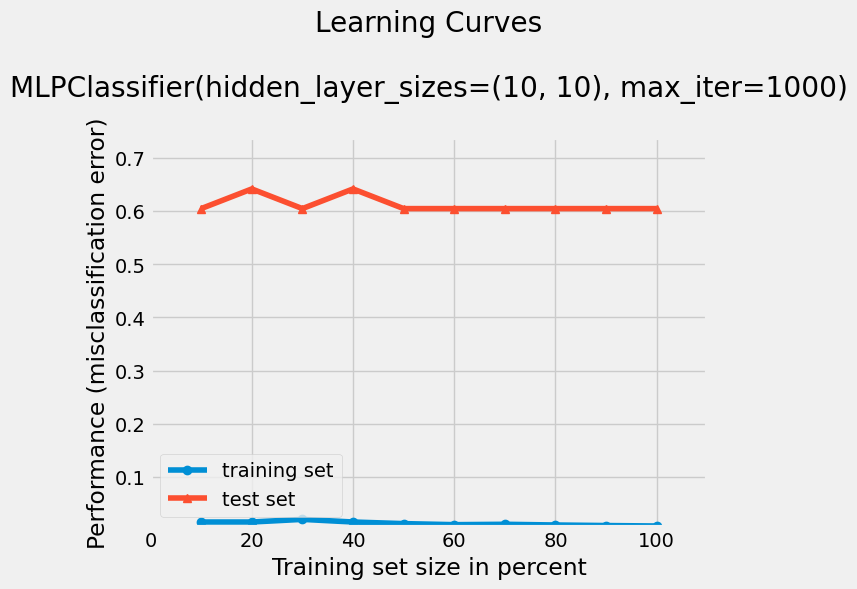

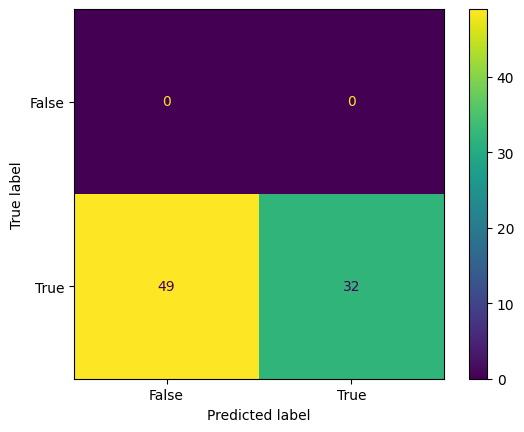

In [25]:
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)
    pred_labels=mlp.predict(X_test)
    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    print('Training set score: {:.4f}'.format(mlp.score(train_data, y_train)))
    print('Test set score: {:.4f}'.format(mlp.score(test_data, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    plt.show()
    return ["Neural Network", percent, mlp]
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#doesn't work
import fasttext
model = fasttext.train_supervised(input="train.txt")
model.predict("flour")
print(model.test("test.txt") )
text = "coach"
labels, prob = model.predict(text)
print("Label:", labels)
print("Probability:", prob)